In [1]:
# Imports 
import pandas as pd
import numpy as np
import pylab as plt
from scipy import stats
from matplotlib import pyplot as plt

In [2]:
# histogram function 

def pdf(data,upper,lower,size,name,xlab):
    bins_size = np.linspace(lower,upper,size)
    
    plt.figure()
    plt.hist(data, bins=bins_size, label=name)
    plt.xlabel(xlab)
    plt.legend()
    plt.yscale('log', nonpositive='clip')
    #plt.savefig("Local/images/IO_wait_pdf_{}.png".format(name), bbox_inches="tight")
    


In [3]:
# graphs for the profiling

def profilingtimings_graph(iostat_path,cpu_mem_path,bips_path,bops_path,command,store):
    
    # loading the data from the txt files 
    
    iostat_col3 = np.loadtxt(iostat_path,skiprows=6,usecols=3,dtype=str)
    iostat_col2 = np.loadtxt(iostat_path,skiprows=6,usecols=2,dtype=str)
    iostat_col3_wait = np.loadtxt(iostat_path,skiprows=3,usecols=3,dtype=str)
    
    bips = np.loadtxt(bips_path,dtype=float)
    bops = np.loadtxt(bops_path,dtype=float)
    
    cpu_mem_col2 = np.loadtxt(cpu_mem_path,skiprows=0,usecols=1,dtype=str)
    cpu_mem_col3 = np.loadtxt(cpu_mem_path,skiprows=0,usecols=3,dtype=str)
    cpu_mem_col4 = np.loadtxt(cpu_mem_path,skiprows=0,usecols=4,dtype=str)
    
    # Splicing the data to get the vprrect data pint from the output text and convertvalues into floats  
    
    iostat_kb_wrtn = list(map(float,iostat_col3[::5]))
    iostat_kb_read = list(map(float,iostat_col2[::5]))
    iostat_iowait  = list(map(float,iostat_col3_wait[::5]))
    
    ip=np.where(cpu_mem_col2=="python")[0]
    
    #ip_len= len(ip)
    
    CPU = list(map(float, cpu_mem_col3[ip]))
    MEM = list(map(float, cpu_mem_col4[ip]))
    
    # The code sleeps for 10s after each command has finished running 
    sleep =-10
    
    # Plotting 
    
    plt.figure()
    #plt.plot(np.arange(0,len(iostat_kb_read),1),iostat_kb_read,label="kb_read/s")
    plt.plot(np.arange(0,len(iostat_kb_wrtn[1:sleep]),1),np.cumsum(iostat_kb_wrtn[1:sleep]),label="iostat: kb_wrtn/s")
    plt.xlabel("Elasped Time (secs)")
    plt.ylabel("Size (KB)")
    plt.title("{}_{}_IO_wrtn(disk)".format(store,command))
    plt.legend(loc='best')
    #plt.savefig("S3/images/IO_write_{}.png".format(command),bbox_inches="tight")
    
    plt.figure()
    plt.plot(np.arange(0,len(iostat_kb_read[1:sleep]),1),np.cumsum(iostat_kb_read[1:sleep]),label="iostat: kb_read/s")
    #plt.plot(np.arange(0,len(iostat_kb_wrtn),1),iostat_kb_wrtn,label="kb_wrtn/s")
    plt.xlabel("Elasped Time (secs)")
    plt.title("{}_{}_IO_read(disk)".format(store,command))
    plt.ylabel("Size (KB)")
    plt.legend(loc='best')
    #plt.savefig("S3/images/IO_read_{}.png".format(command), bbox_inches="tight")

    plt.figure()
    plt.plot(np.arange(0,len(bops[1:sleep]),1),np.cumsum(bops[1:sleep]*10**(-3)),label="Ifdata: writes (bops)")
    plt.xlabel("Elasped time (secs)")
    plt.ylabel("Size (KB)")
    plt.title("{}_{}_IO_wrtn(network)".format(store,command))
    plt.legend(loc='best')
    #plt.savefig("S3/images/IO_bops_{}.png".format(command), bbox_inches="tight")
    
    plt.figure()
    plt.plot(np.arange(0,len(bips[1:sleep]),1),np.cumsum(bips[1:sleep]*10**(-3)),label="Ifdata: reads (bips)")
    plt.xlabel("Elasped time (secs)")
    plt.ylabel("Size (KB/s)")
    plt.title("{}_{}_IO_read(network)".format(store,command))
    plt.legend(loc='best')
    #plt.savefig("S3/images/IO_bips_{}.png".format(command), bbox_inches="tight")
    
    plt.figure()
    plt.plot(np.arange(0,len(iostat_iowait[1:sleep]),1),iostat_iowait[1:sleep],label="iostat: iowait")
    plt.xlabel("Elasped time (secs)")
    plt.ylabel("Usage (%)")
    plt.title("{}_{}_CPU".format(store,command))
    plt.legend(loc='best')
    #plt.savefig("S3/images/IO_wait_{}.png".format(command), bbox_inches="tight")
    
    plt.figure()
    plt.plot(np.arange(0,len(CPU),1),CPU,label="CPU")
    plt.xlabel("Elasped Time (secs)")
    plt.ylabel("Usage (%)")
    plt.title("{}_{}_RAM".format(store,command))
    plt.legend(loc='best')
    #plt.savefig("S3/images/IO_CPU_{}.png".format(command), bbox_inches="tight")


    plt.figure()
    plt.plot(np.arange(0,len(MEM),1),MEM,label="RAM")
    plt.xlabel("Elasped Time (secs)")
    plt.ylabel("Usage (%)")
    plt.legend(loc='best')
    #plt.savefig("S3/images/IO_MEM_{}.png".format(command))
    
    #print(len(CPU));
    return 
    

In [4]:
def profilingtimings(iostat_path,cpu_mem_path,bips_path,bops_path,command,store):
    
    # loading the data from the txt files 
    
    iostat_col3 = np.loadtxt(iostat_path,skiprows=6,usecols=3,dtype=str)
    iostat_col2 = np.loadtxt(iostat_path,skiprows=6,usecols=2,dtype=str)
    iostat_col3_wait = np.loadtxt(iostat_path,skiprows=3,usecols=3,dtype=str)
    
    bips = np.loadtxt(bips_path,dtype=float)
    bops = np.loadtxt(bops_path,dtype=float)
    
    cpu_mem_col2 = np.loadtxt(cpu_mem_path,skiprows=0,usecols=1,dtype=str)
    cpu_mem_col3 = np.loadtxt(cpu_mem_path,skiprows=0,usecols=3,dtype=str)
    cpu_mem_col4 = np.loadtxt(cpu_mem_path,skiprows=0,usecols=4,dtype=str)
    
    # Splicing the data to get the vprrect data pint from the output text and convertvalues into floats
    
    iostat_kb_wrtn = list(map(float,iostat_col3[::5]))
    iostat_kb_read = list(map(float,iostat_col2[::5]))
    iostat_iowait  = list(map(float,iostat_col3_wait[::5]))
    
    ip=np.where(cpu_mem_col2=="python")[0]
    
    #ip_len= len(ip)
    
    CPU = list(map(float, cpu_mem_col3[ip]))
    MEM = list(map(float, cpu_mem_col4[ip]))

    return len(CPU) ,sum(iostat_kb_wrtn),sum(iostat_kb_read ),np.mean(CPU),np.mean(MEM), np.mean(iostat_iowait) ,sum(bips) ,sum(bops)

In [5]:
# function that create the paths to the txt file 
def path(storage,command):
    cpu = "/home/vrs42921/LSST-RAL-ECHO-EXP/lsst/time_test/{}/{}/info_cpu_mem.txt" .format(storage,command)
    io = "/home/vrs42921/LSST-RAL-ECHO-EXP/lsst/time_test/{}/{}/info_iostat.txt" .format(storage,command)
    bips = "/home/vrs42921/LSST-RAL-ECHO-EXP/lsst/time_test/{}/{}/info_ifdata_bips.txt" .format(storage,command)
    bops = "/home/vrs42921/LSST-RAL-ECHO-EXP/lsst/time_test/{}/{}/info_ifdata_bops.txt" .format(storage,command)
    return cpu , io ,bips ,bops
# command line task / pipetasks 

com=["processccd","coaddtions","multiband"]

# end point storages 

store =["cephfs","S3"]

# print formatting 

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
   NEXT ='\n'

In [6]:
# collating all the data into a list 

col1= []
for i in range(len(store)):
    for j in range(len(com)):
        times,sum_wrtn,sum_read,mean_cpu,mean_ram,mean_iowait,sum_bips,sum_bops = profilingtimings(path(store[i],com[j])[1],
                                                                                                   path(store[i],com[j])[0],
                                                                                                   path(store[i],com[j])[2],
                                                                                                   path(store[i],com[j])
                                                                                                   [3],com[j],store[i])
        col1.append(times)
        col1.append(sum_read*1e-3 + sum_bips*1e-6)
        col1.append(sum_wrtn*1e-3 + sum_bops*1e-6)
        col1.append(mean_iowait)
        col1.append(mean_cpu)
        col1.append(mean_ram)  





In [7]:
# Creating a Table of the data 

print(color.NEXT + color.BOLD + color.UNDERLINE + "{}" .format(store[0]) + color.END)
d = {'Processccd': col1[:6], 'Coaddtions': col1[6:12],'Multiband': col1[12:18]}
df = pd.DataFrame(data=d, index=["Time (seconds)","Total reads (disk + network) (MB)","Total writes (disk + network) (MB)",
                                 "Average io wait (%)",
                                 "Average CPU usage (%) (8 cores = 800% )","Average RAM usage (%) (32GB)"])
df.round(2)


cephfs


,Processccd,Coaddtions,Multiband
Time (seconds),2441.00,2992.00,19053.00
Total reads (disk + network) (MB),1053.50,2630.09,2095.50
Total writes (disk + network) (MB),5548.87,5369.09,5162.70
Average io wait (%),0.14,0.12,0.02
Average CPU usage (%) (8 cores = 800% ),97.59,96.34,106.56
Average RAM usage (%) (32GB),3.04,15.38,25.55


In [8]:
# Creating a Table of the data

print(color.NEXT + color.BOLD + color.UNDERLINE + "{}" .format(store[1]) + color.END)
d2 = {'Processccd': col1[18:24], 'Coaddtions': col1[24:30],'Multiband': col1[30:]}
df2 = pd.DataFrame(data=d2, index=["Time (seconds)","Total reads (disk + network) (MB)","Total writes (disk + network) (MB)",
                                 "Average io wait (%)",
                                 "Average CPU usage (%) (8 cores = 800% )","Average RAM usage (%) (32GB)"])
df2.round(2)


S3


,Processccd,Coaddtions,Multiband
Time (seconds),2683.00,3967.00,19178.00
Total reads (disk + network) (MB),4677.60,108447.21,9764.09
Total writes (disk + network) (MB),5775.97,7891.27,5966.47
Average io wait (%),0.06,0.06,0.01
Average CPU usage (%) (8 cores = 800% ),93.08,92.58,103.13
Average RAM usage (%) (32GB),2.84,35.38,32.81


<ipython-input-41-d95d78dfca89>:87: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


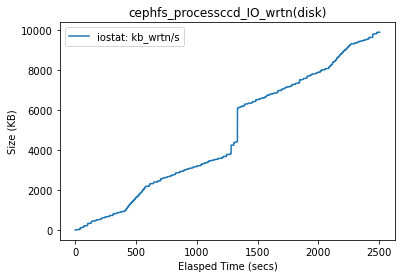

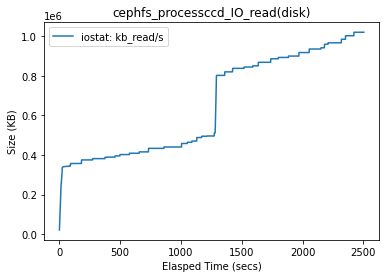

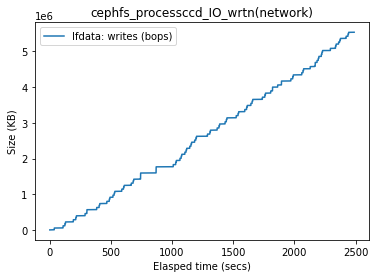

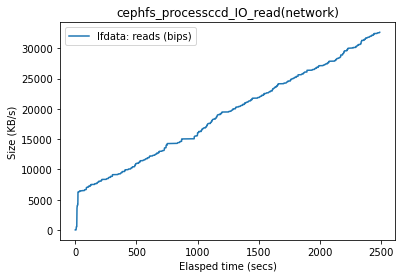

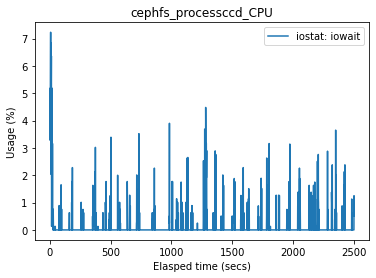

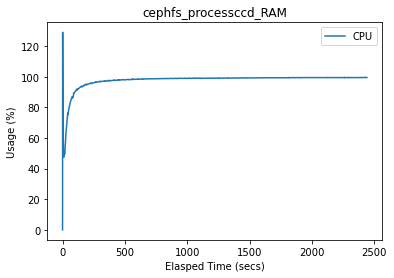

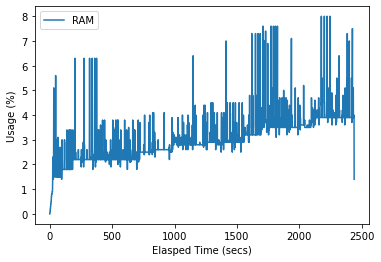

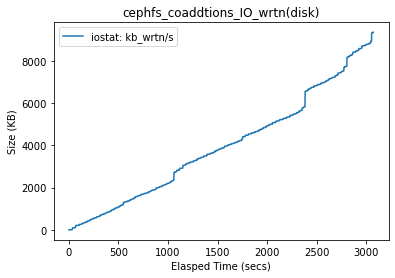

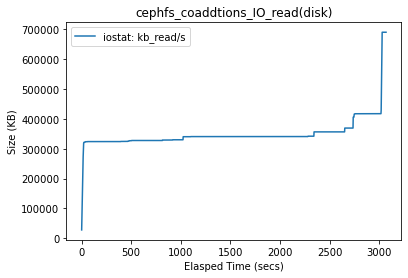

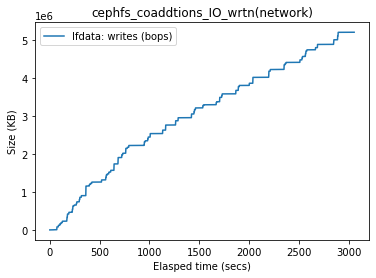

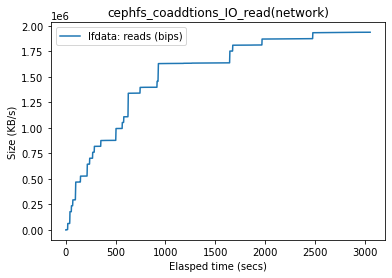

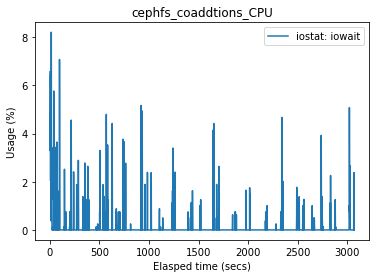

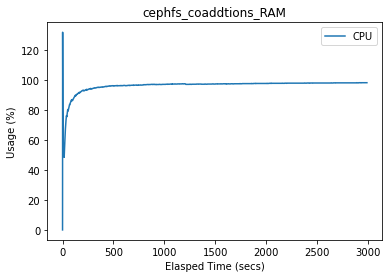

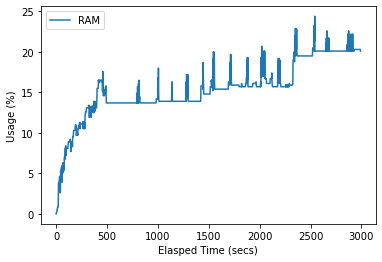

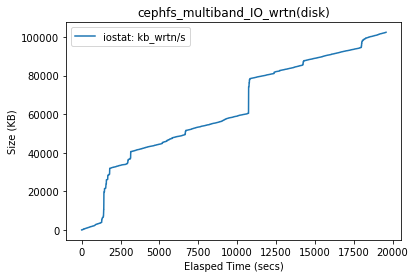

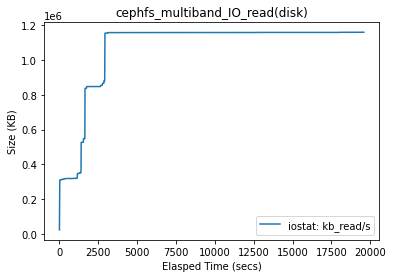

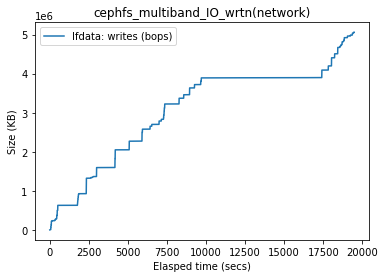

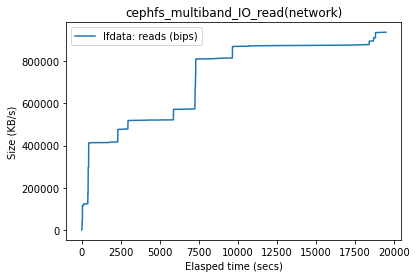

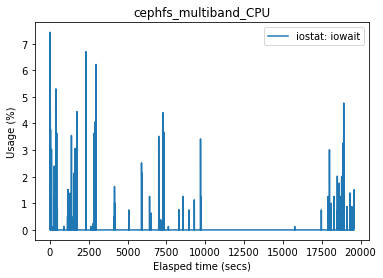

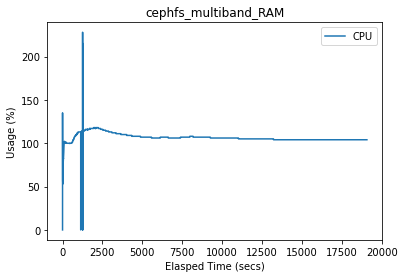

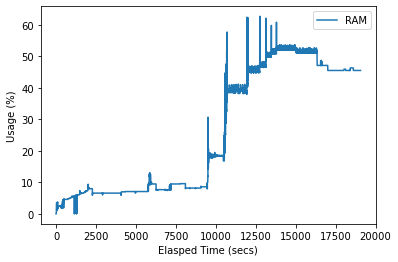

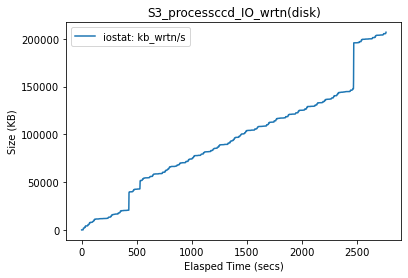

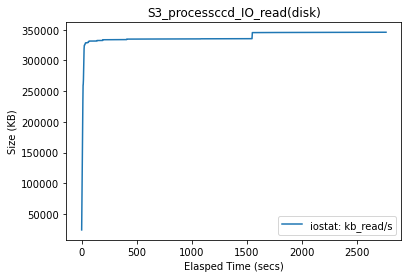

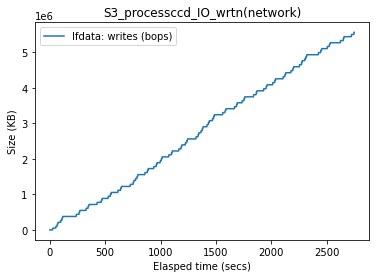

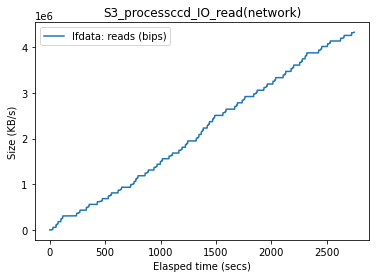

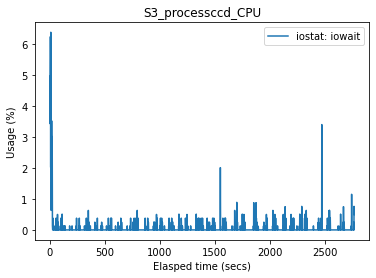

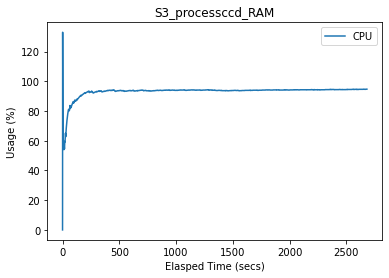

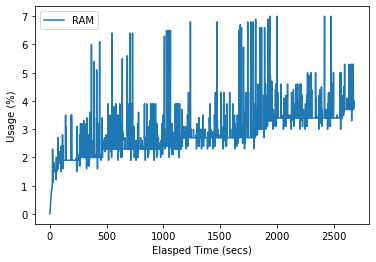

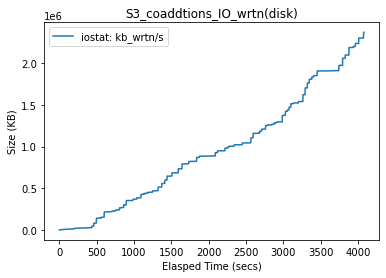

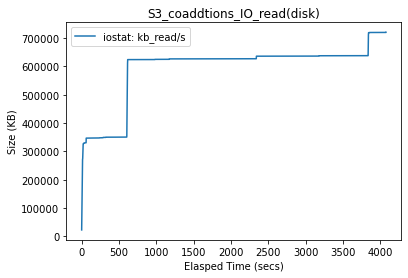

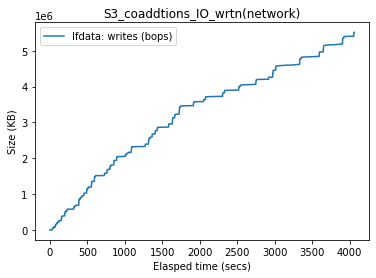

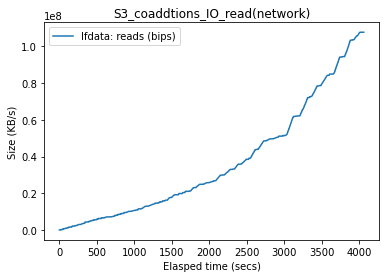

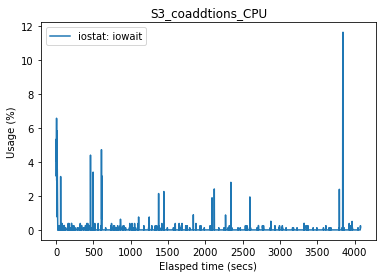

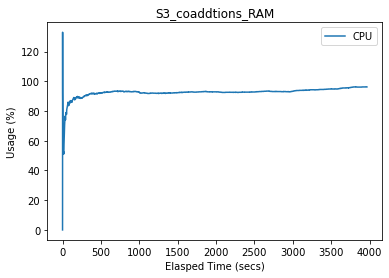

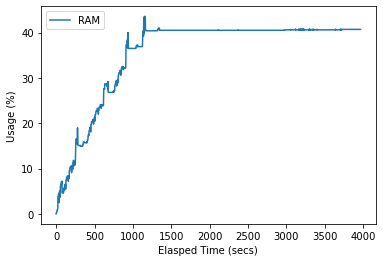

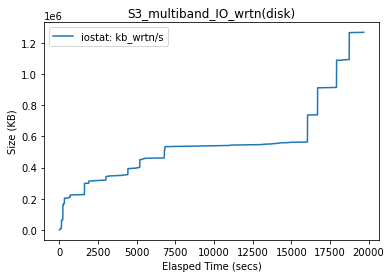

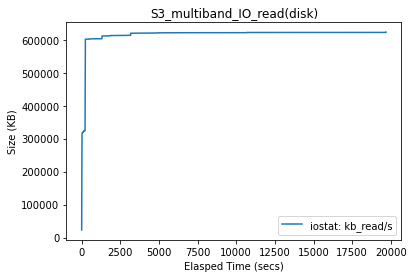

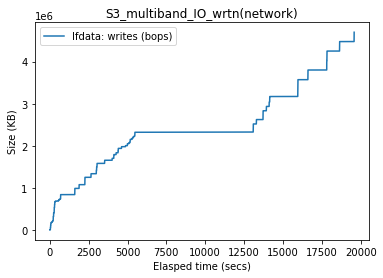

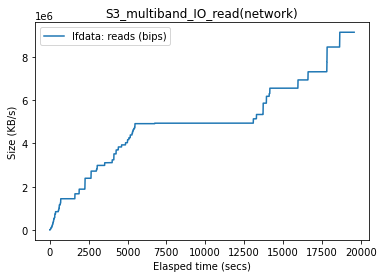

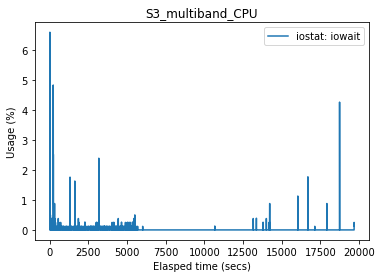

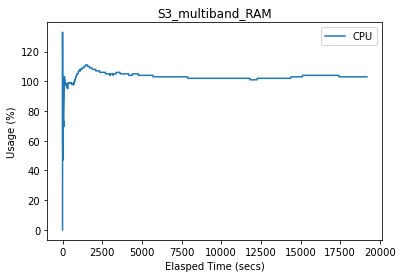

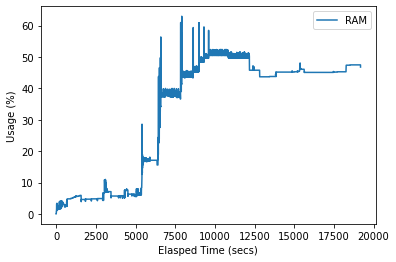

In [47]:
# Plottiing all of the profiliing plots 

for i in range(len(store)):
    for j in range(len(com)):
        times = profilingtimings_graph(path(store[i],com[j])[1],path(store[i],com[j])[0],path(store[i],com[j])[2],path(store[i],com[j])[3],com[j],store[i])
      